In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcparams = {"fontsize": 16}
fig_params = {"dpi": 100, "figsize": (8, 5)}

### Функции Целей

In [ ]:
def gauss_func(x, mean=0, var=1):
    return 1/(np.pi * 2 * np.sqrt(var)) * np.exp(-(x - mean)**2/(2 * var))

In [99]:
def signal_func(x, pos = [0.15, 0.45], var = [0.000001, 0.000001]):
    pos = np.array(pos)
    var = np.array(var)
    signal = np.zeros_like(x)
    for idx, target in enumerate(pos):
        signal += gauss_func(x, target, var[idx])
    return signal

In [1]:
K = 10                  # Количество датчиков устройств
k = 2 * np.pi           # Волновое число
d = 0.7                 # Расстояния между датчиками
s = 1/ (0.82 * (K * 2 + 1) * 2 * d)
s1 = 1.4 * s

targets = [-0.015, 0.015]
x = np.linspace(-s1, s1, 1000)

plt.figure(**fig_params)
plt.title("Распределение целей в уговом разрешении")
plt.plot(x, signal_func(x, targets), c="#000000", label = "Истинное распределение целей")
plt.xlabel("Угловое пространство от -1 до 1")
plt.ylabel("Распределение интенсивности источников")
plt.legend()
plt.grid()
plt.show()

NameError: name 'np' is not defined

In [ ]:
def F(t, alpha = 0, ND = 1, d = 0.7, K = 15, k = 2 * np.pi):
    result = 0
    for n in np.arange(1, K + 1):
        result += np.cos(k * d * n * (t - alpha))
    return result * 2 * ND + ND

In [2]:
plt.figure(**fig_params)
plt.title("Диаграммы направленности системы наблюдения")
plt.plot(x, F(x), linestyle = "--", 
         linewidth = 2, color= "#000000", label = "F_cos")
plt.plot(x, np.zeros(x.shape), label = "0")
plt.xlabel("Угловое пространство")
plt.ylabel("Значения функции приемного устройства")
plt.legend()
plt.grid()
plt.show()

NameError: name 'plt' is not defined

In [3]:
def integral_of_func(func, lower = -1, upper = 1, N = 1000, **kwargs):
    h = (upper - lower) / N
    array_1d = np.arange(lower + h, upper + h, h)
    result = np.sum(func(array_1d, **kwargs) * h)
    return result

int_func = np.vectorize(integral_of_func)

NameError: name 'np' is not defined

In [139]:
Idel = lambda t: signal_func(t, pos = targets)

def integrand(t, alpha):
    return F(t - alpha, ND = 1, d = d, K = K, k = k) * Idel(t)

def U00(a):
    return sp.integrate.quad(integrand, x[0], x[-1], args = (a, ))[0]

vec_U00 = np.vectorize(U00)

In [140]:
# Расчет принятого сигнала
U00_np = vec_U00(x)

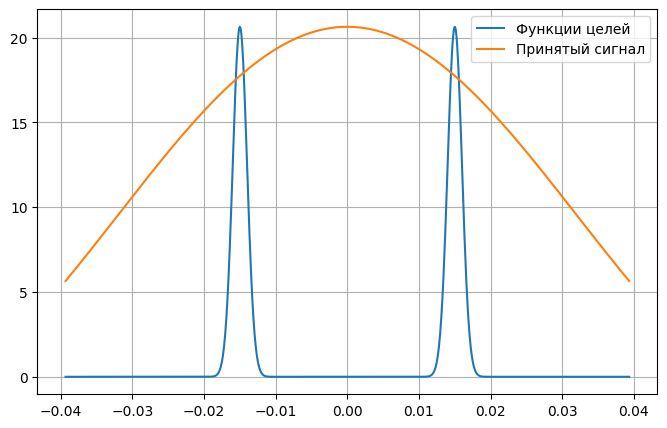

In [142]:
signal_test = Idel(x) 

plt.figure(**fig_params)
plt.plot(x, signal_test / np.max(signal_test) * np.max(U00_np), label = "Функции целей")
plt.plot(x, U00_np, label = "Принятый сигнал")
plt.legend()
plt.grid()
plt.show()

In [143]:
def integrand_Cn(t, n = 1):
    return np.cos(k * d * n * t) * Idel(t)

int_func = np.vectorize(integral_of_func)

In [145]:
NP = 200
NPa = np.arange(0, NP)

In [146]:
Cn = int_func(func=integrand_Cn, lower = -1, upper=1, N = 20000, n = NPa)

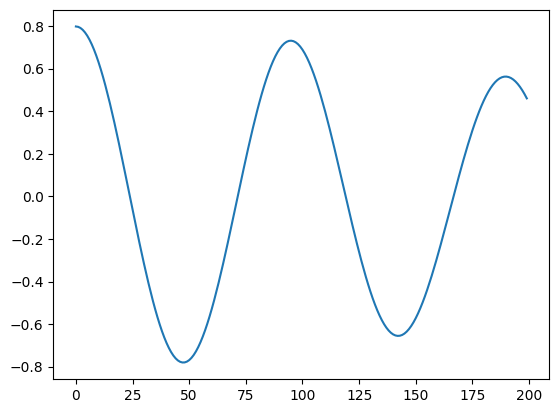

In [147]:
plt.plot(NPa, Cn)

In [148]:
def U01(x, Cn):
    result = 0
    for n, cn in enumerate(Cn[1:]):
        result += 2 * cn * np.cos(- 1j * k * d * (n + 1) * x)
    return result + Cn[0]

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


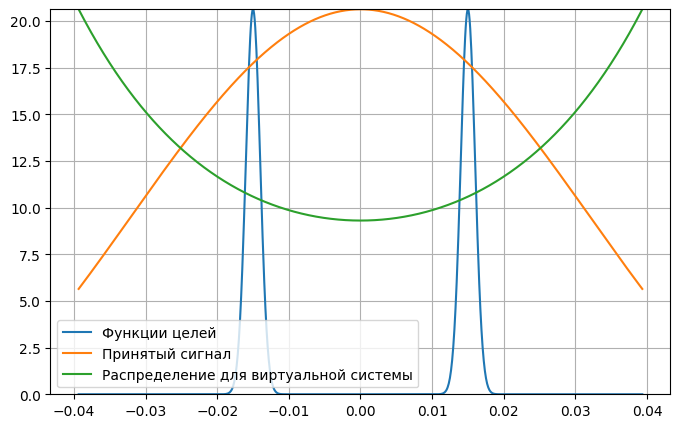

In [153]:
U01_np = U01(x, Cn[:15])
signal_test = Idel(x) 

plt.figure(**fig_params)
plt.plot(x, signal_test / np.max(signal_test) * np.max(U00_np), label = "Функции целей")
plt.plot(x, U00_np, label = "Принятый сигнал")
plt.plot(x, U01_np / np.max(U01_np) * np.max(U00_np), label = "Распределение для виртуальной системы")
plt.ylim((0, np.max(U00_np)))
plt.legend()
plt.grid()
plt.show()